In [44]:
#Data Structures
import pandas as pd
import numpy as np
#Kmeans
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Visualization
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from wordcloud import WordCloud
plt.style.use('seaborn-pastel')
#Random State
random_state = 777
tknzr = TweetTokenizer()
stopwords = stopwords.words('english')

In [55]:
#Read in Clean Tweets 
df = pd.read_csv('cleaned_tweets17SDG.csv', lineterminator='\n',index_col = 0)

In [56]:
#Get Rid of NaN
df = df[~df.clean_tweet.isnull()]

In [57]:
df['clean_tweet'] = df['clean_tweet'].drop_duplicates()

In [58]:
df = df[~df.clean_tweet.isnull()]

In [59]:
# #Create Individual DFs
# for sdg in range(1,18):
#     locals()['df_' + f'{sdg}'] = df[(df['sdg'] == sdg)]

In [60]:
#Look and drop duplicates again 
# df_1['clean_tweet'] = df_1['clean_tweet'].drop_duplicates()

In [61]:
# #Drop NaNs will redo cleaning something wrong with text preprocessing 
# df_1 = df_1[~df_1.clean_tweet.isnull()]

In [76]:
#Vectorize Tweets 
tfidf_vec = TfidfVectorizer(stop_words = stopwords, max_df = 0.95, min_df = 0.0001)
features = tfidf_vec.fit_transform(df.clean_tweet.values)
features

<147033x13768 sparse matrix of type '<class 'numpy.float64'>'
	with 2168575 stored elements in Compressed Sparse Row format>

In [77]:
#Within Cluster Sum of Squares find optimal K 
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, 
                    random_state = random_state,max_iter=300,
                   init ='k-means++')
    kmeans.fit(features)
    wcss.append(kmeans.inertia_) 

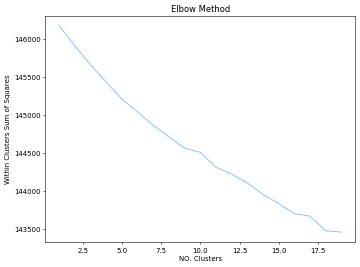

In [78]:
#Plot Elbow 
plt.figure(figsize=(8, 6), dpi=50)
plt.plot(range(1,20),wcss)
plt.title('Elbow Method')
plt.xlabel('NO. Clusters')
plt.ylabel('Within Clusters Sum of Squares')
plt.show()

In [79]:
#Elbow Suggests 2 
model = KMeans(n_clusters = 17, 
               random_state = random_state,max_iter=300, 
               init ='k-means++')
model.fit(features)

KMeans(n_clusters=17, random_state=777)

In [80]:
kmean_indices = model.fit_predict(features)

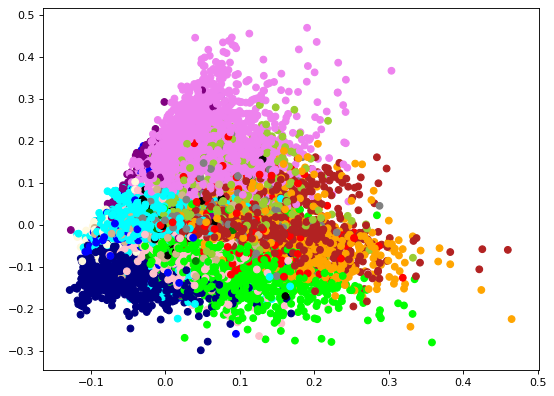

In [91]:
#Plot Clusters use PCA to reduce Dimensions 
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(features.toarray())

colors = ['grey', 'purple', 'blue', 'green', 'orange', 'red',
            'black', 'firebrick', 'cornsilk', 'yellowgreen', 'aqua', 'cyan',
            'violet', 'navy', 'pink', 'lime', 'tan']
# reduced_cluster_centers = pca.transform(model.cluster_centers_)
# plt.scatter(scatter_plot_points[:,0], scatter_plot_points[:1], c = kmean_indices)
# plt.scatter(scatter_plot_points[:,0], scatter_plot_points[:1], 
#            marker = 'x', s = 150, c = 'b')

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(8,6), dpi = 80)

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])
# too much text to annotate
# for i, txt in enumerate(df_1_list):
#     ax.annotate(txt, (x_axis[i], y_axis[i]))
plt.show()

In [86]:
#Label text 
labels=model.labels_
df_list = df.clean_tweet.to_list()
tweet_df = pd.DataFrame(list(zip(df_list,labels)),columns=['tweet','cluster'])
print(tweet_df.sort_values(by=['cluster']))

                                                    tweet  cluster
38219   food ate subway after a long time and they put...        0
64168   they are one of few districts allowing days we...        0
93546   pan esa one never existed only isa is attested...        0
110712  i for one do not appreciate you attacking the ...        0
30351   one of the weirder things about drafts is how ...        0
...                                                   ...      ...
43646   we need to stop letting cultural norms dictate...       16
111477  tiktok is a joke lol charged pedophiles can st...       16
25426   i briefly subleased from a person and the land...       16
25432   it s fine let people waste their money on an x...       16
18884   umm uk based pro green agenda and democrats us...       16

[147033 rows x 2 columns]


Cluster: 0


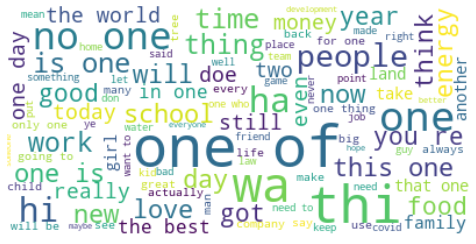

Cluster: 1


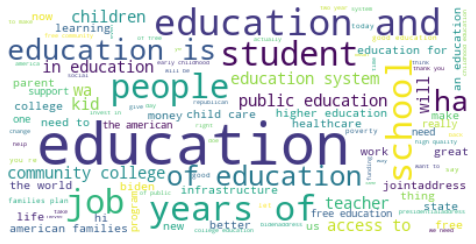

Cluster: 2


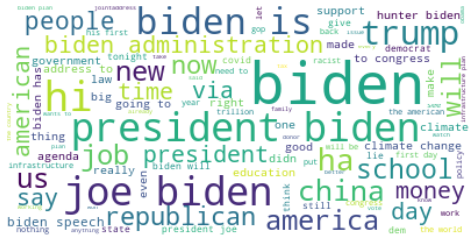

Cluster: 3


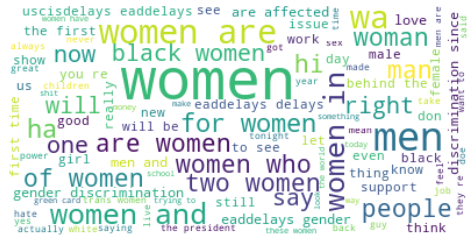

Cluster: 4


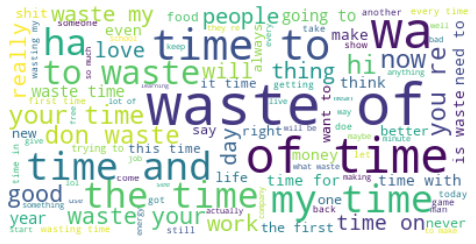

Cluster: 5


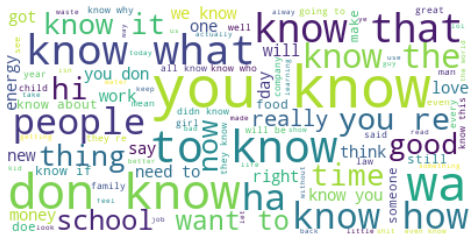

Cluster: 6


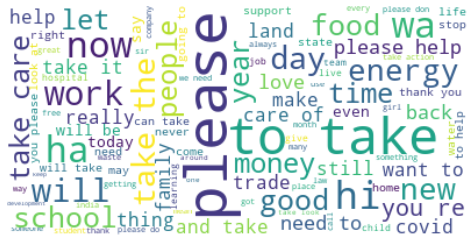

Cluster: 7


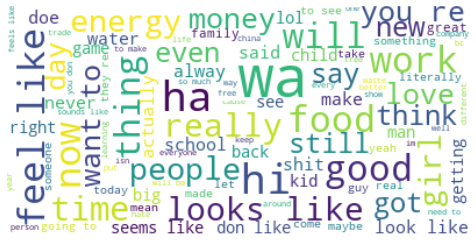

Cluster: 8


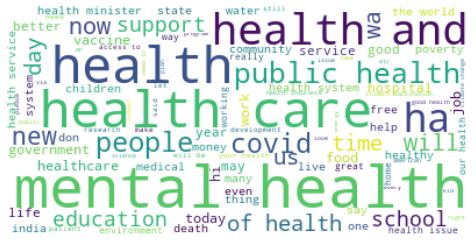

Cluster: 9


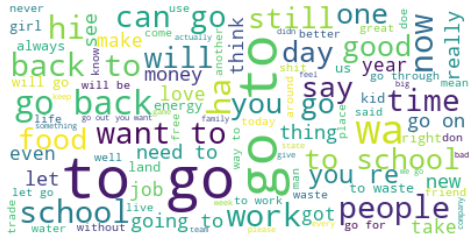

Cluster: 10


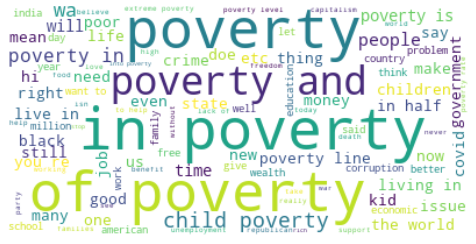

Cluster: 11


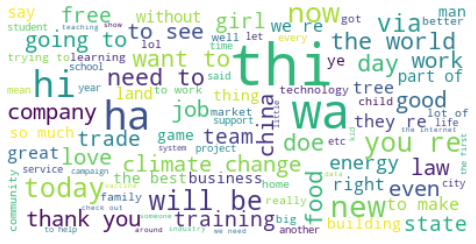

Cluster: 12


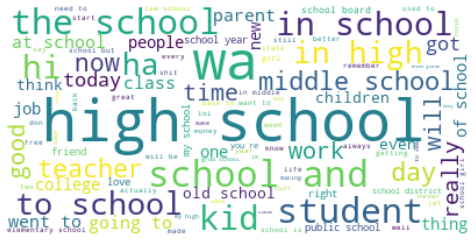

Cluster: 13


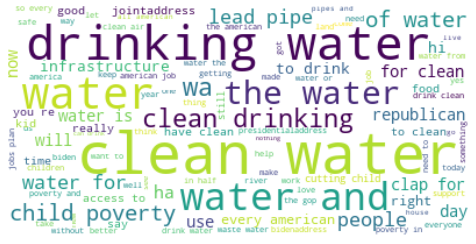

Cluster: 14


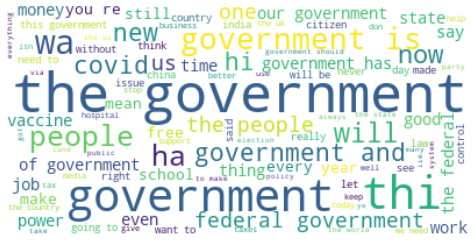

Cluster: 15


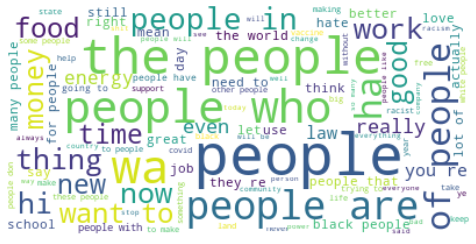

Cluster: 16


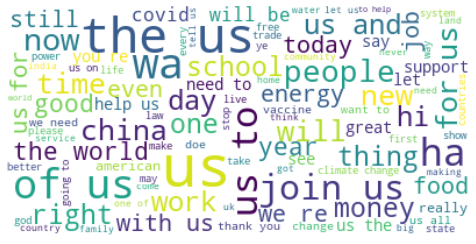

In [89]:
#Plot word Cloud 
result={'cluster':labels,'tweet':df_list}
result=pd.DataFrame(result)
for k in range(0,17):
    s=result[result.cluster==k]
    text=s['tweet'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100,
                          background_color="white").generate(text)
    print('Cluster: {}'.format(k))

    plt.figure(figsize=(10,10), dpi = 60)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()